# Situation: 
Driven by the need to ensure that students are highly employable, university J runs a placement scheme for their post grad MBA students. After running the scheme for some time, they have secured data on over 200 students who applied to the scheme. 

They now, however, wishes to ensure that the system is optimised and works for all eligible students . As such, they have asked for insight on: 
* whether the scheme discriminate/ favour certain students?
* Students success rate depending on their academic performance.
* A mechanism for predicting if a student is likely to successfully placed. 

Based upon the staff member's input the client has asked for two to three models, comprising of SVC, logistic regression and a random forest. 


# Overview
The data provide by the university is anonymised and consists of the following information for over 200 students. 

| Column name | Column detail  | Data type |
| --- | --- | --|
|gender | Male='M', Female='F' | Categorical, binary |
|ssc_p | Secondary Education percentage- 10th Grade | Numerical, continuous | 
|ssc_b  | Board of Education- Central/ Others | Categorical, normal  |
|hsc_p|Higher Secondary Education percentage- 12th Grade| Numerical, continuous |
|hsc_b|Board of Education- Central/ Others| Categorical, normal |
|hsc_s|Specialization in Higher Secondary Education|Categorical, normal | 
|degree_p|Degree Percentage| Numerical continuous | 
| degree_t| Under Graduation(Degree type)- Field of degree education| Categorical, normal|
|workex|Work Experience|Categorical, binary |
|etest_p|Employability test percentage ( conducted by college)|Numerical, continuous |
|specialisation|Post Graduation(MBA)- Specialization|Categorical, normal |
|mba_p|MBA percentage|Numerical, continuous |
|status|Status of placement- Placed/Not placed|Categorical, binary |
|Salary|Salary offered by corporate to candidates|Numerical, discreate|

# Importing necessary libraries and loading dataset

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [132]:
data=pd.read_csv('Placement_Data_Full_Class.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [133]:
data.shape

(215, 15)

In [134]:
data.info

<bound method DataFrame.info of      sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0        1      M  67.00   Others  91.00   Others  Commerce     58.00   
1        2      M  79.33  Central  78.33   Others   Science     77.48   
2        3      M  65.00  Central  68.00  Central      Arts     64.00   
3        4      M  56.00  Central  52.00  Central   Science     52.00   
4        5      M  85.80  Central  73.60  Central  Commerce     73.30   
..     ...    ...    ...      ...    ...      ...       ...       ...   
210    211      M  80.60   Others  82.00   Others  Commerce     77.60   
211    212      M  58.00   Others  60.00   Others   Science     72.00   
212    213      M  67.00   Others  67.00   Others  Commerce     73.00   
213    214      F  74.00   Others  66.00   Others  Commerce     58.00   
214    215      M  62.00  Central  58.00   Others   Science     53.00   

      degree_t workex  etest_p specialisation  mba_p      status    salary  
0     Sci&Tech

# Data preprocessing

In [135]:
columns=['hsc_s','degree_t','specialisation','hsc_b','ssc_b']
for i in columns:
    unique=data[i].unique()
    print('the column name : ' ,i)
    print('unique elements: ' ,unique)
    print('-----------------------------------------------------')
    
    

the column name :  hsc_s
unique elements:  ['Commerce' 'Science' 'Arts']
-----------------------------------------------------
the column name :  degree_t
unique elements:  ['Sci&Tech' 'Comm&Mgmt' 'Others']
-----------------------------------------------------
the column name :  specialisation
unique elements:  ['Mkt&HR' 'Mkt&Fin']
-----------------------------------------------------
the column name :  hsc_b
unique elements:  ['Others' 'Central']
-----------------------------------------------------
the column name :  ssc_b
unique elements:  ['Others' 'Central']
-----------------------------------------------------


In [136]:
print(data.isna().sum())
len(data[data['status']=='Not Placed']) # the conclusion is fill null values with 0 ,because salary is null value when status is not placed

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64


67

In [137]:
data['salary'].fillna(0,inplace=True)

In [138]:
data.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

# count of status based on gender

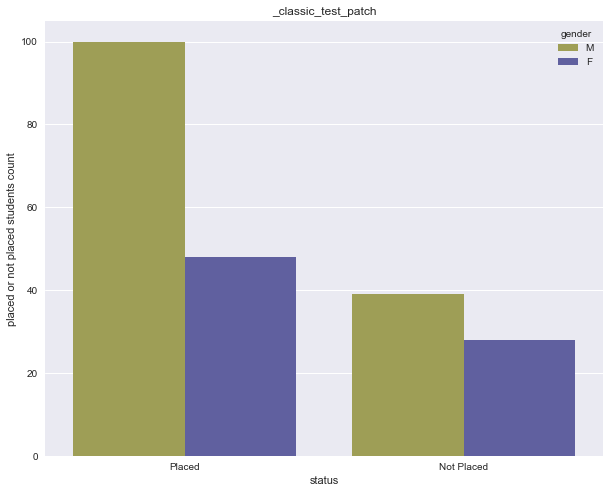

In [139]:
plt.figure(figsize=(10,8))
sns.countplot(x=data['status'],hue=data['gender'],palette='gist_stern_r')
plt.title('_classic_test_patch')
plt.ylabel('placed or not placed students count')
plt.show()

# placements

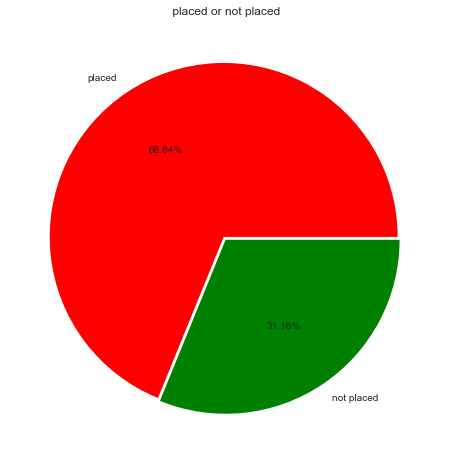

In [140]:
plt.figure(figsize=(8,8))
plt.style.use('seaborn-colorblind')
plt.pie(data.status.value_counts(),labels=['placed','not placed'],colors=['red','green'],explode=(0.01,0.01),autopct="%.2f%%")
plt.title(' placed or not placed')
plt.show()

In [141]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

# secondry education analysing

<Figure size 1224x936 with 0 Axes>

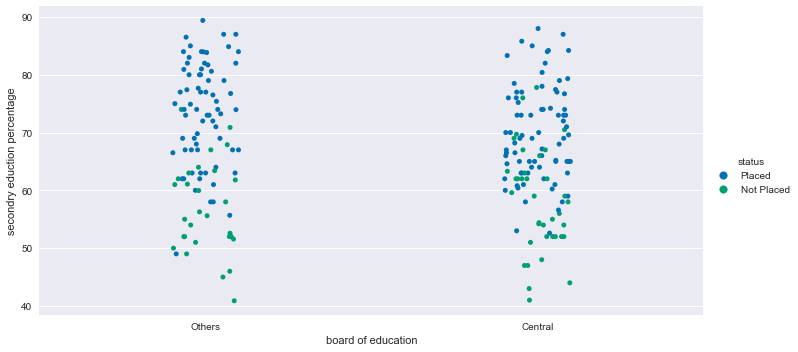

In [142]:
plt.figure(figsize=(17,13))
sns.catplot(x='ssc_b', y='ssc_p', data=data,hue='status',aspect=2, kind='strip')
plt.style.use('seaborn')
plt.ylabel('secondry eduction percentage')
plt.xlabel("board of education")
plt.show()


# Higher secondry education analysing

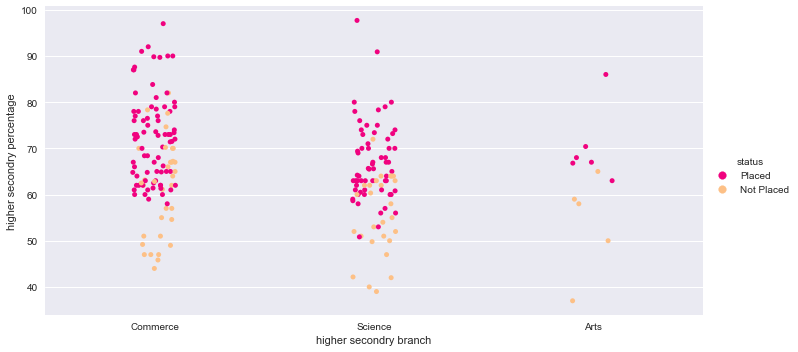

In [143]:

sns.catplot(x='hsc_s', y='hsc_p', data=data,hue='status',aspect=2, kind='strip',palette='Accent_r')
plt.style.use('seaborn')
plt.style.use('seaborn')
plt.ylabel('higher secondry percentage')
plt.xlabel('higher secondry branch')
plt.show()


# Degree

<AxesSubplot:title={'center':'status--field of degree'}, xlabel='status', ylabel='count'>

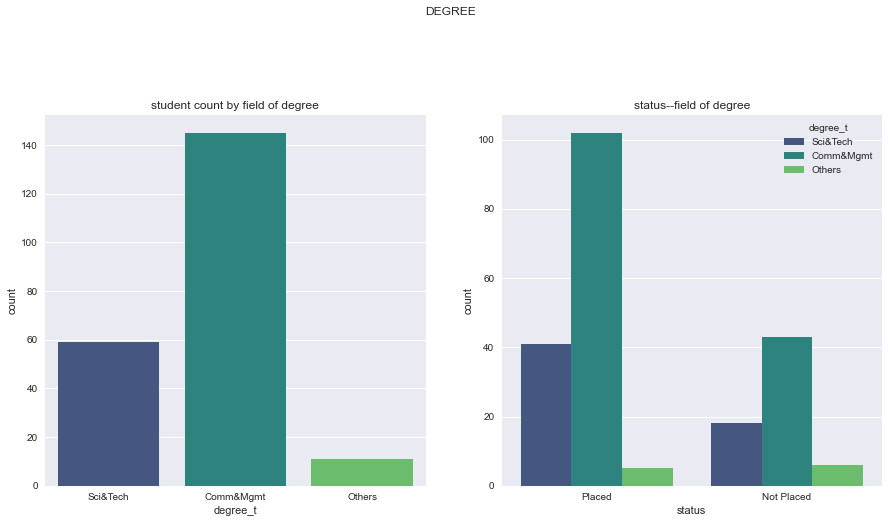

In [144]:
plt.figure(figsize=(15,15))
plt.suptitle('DEGREE')
plt.subplot(2,2,1)
plt.title('student count by field of degree')
sns.countplot(data['degree_t'],palette='viridis')
plt.subplot(2,2,2)
plt.title('status--field of degree')
sns.countplot(x='status',data=data,hue='degree_t',palette='viridis')

# status-specialisation

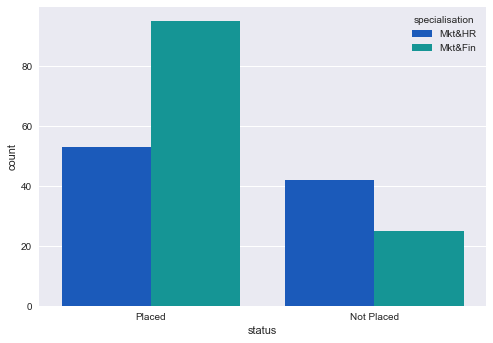

In [145]:
sns.countplot(data['status'],hue=data['specialisation'],palette='winter')
plt.show()

# status-work experience

<AxesSubplot:xlabel='status', ylabel='count'>

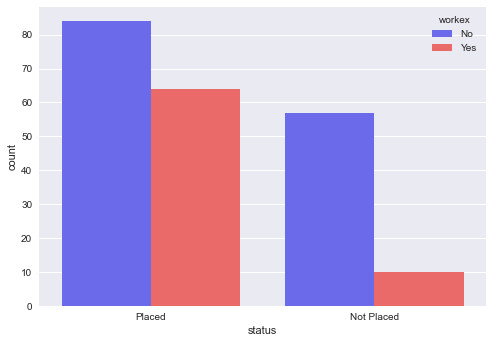

In [146]:
sns.countplot(data['status'],hue=data['workex'],palette='seismic')

# Average marks for getting placeement in diffrent qualification

In [147]:
ed=[]
am=[]
education=['ssc_p','hsc_p','degree_p','mba_p','etest_p']
for i in education:
    p=data[data['status']=='Placed'][i].mean()
    ed.append(i)
    am.append(p)
result=pd.DataFrame({'education':ed,"average mark for getting placed":am})
result

   

,education,average mark for getting placed
0,ssc_p,71.721486
1,hsc_p,69.926554
2,degree_p,68.740541
3,mba_p,62.579392
4,etest_p,73.238041


# average salary of--->

In [148]:
int(data[data['workex']=='Yes']['salary'].mean()) #with experience

262283

In [149]:
int(data[data['workex']=='No']['salary'].mean()) #without experience

165333

# correlation

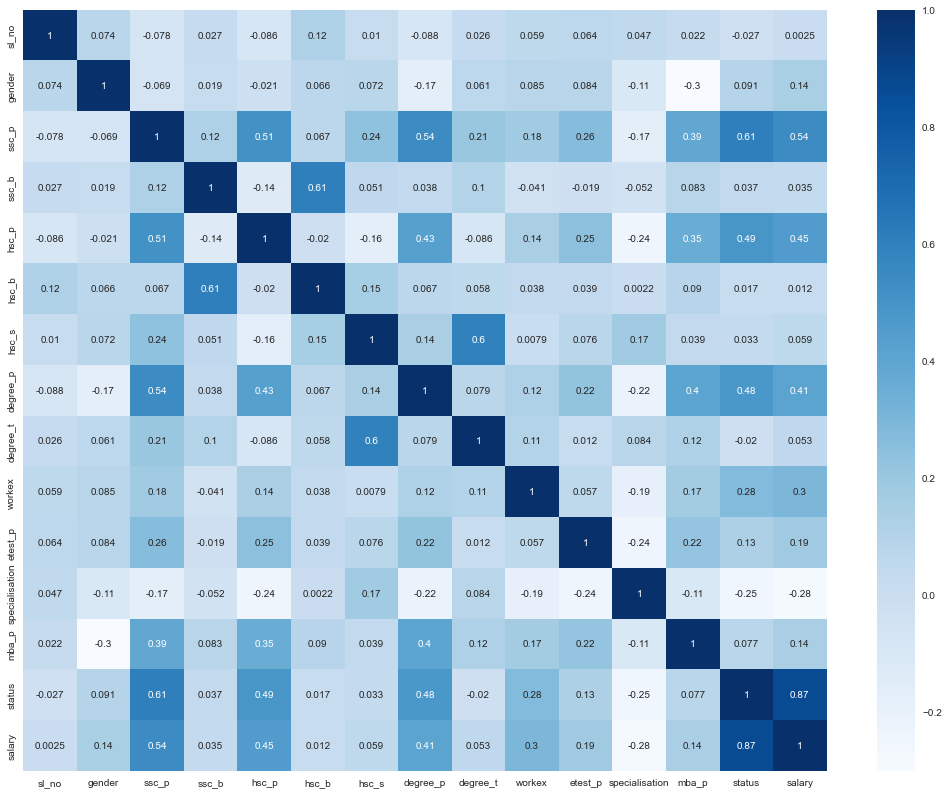

In [176]:
plt.figure(figsize=(18,14))
plt.style.use('seaborn')
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.show()

# converting object datatype to numeric using label1encoder

In [151]:
data.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [152]:
data.dtypes

sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

In [153]:
le=LabelEncoder()
columns=list(data.select_dtypes (include='object').columns)
for i in columns:
    data[i]=le.fit_transform(data[i])
    

In [154]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


# splitting data 

In [155]:
x=data.drop(['sl_no','status','salary'],axis=1)
y=data['status']

In [156]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=10)
print(x_train.shape)
print(y_train.shape)

(172, 12)
(172,)


# Standard scaler

In [157]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [158]:
x_train

array([[-1.28302527,  0.38649015,  1.15079291, ..., -1.24826883,
         1.15079291, -0.66549564],
       [ 0.77940787, -0.46753419, -0.86896608, ...,  0.47734365,
        -0.86896608, -1.34676268],
       [ 0.77940787, -0.94199216, -0.86896608, ..., -0.74975856,
         1.15079291, -0.23196207],
       ...,
       [-1.28302527, -0.277751  , -0.86896608, ...,  0.01718032,
        -0.86896608,  0.44222688],
       [-1.28302527,  1.52518927, -0.86896608, ...,  0.24726199,
        -0.86896608,  1.97640487],
       [ 0.77940787, -0.94199216, -0.86896608, ..., -1.36330966,
        -0.86896608, -1.76083148]])

# Hyperparameter tuning by grid search cv

In [159]:
model_param={'Random_Forest':{'model':RandomForestClassifier(),'params':{'n_estimators':[1,5,10,15]}},
            'DecisionTree':{'model':DecisionTreeClassifier(),'params':{'max_depth':[4,5,7,10]}},
             'LogisticRegression':{'model':LogisticRegression(),'params':{'C':[1,5,10]}},
             'svc':{'model':SVC(),'params':{'C':[1,5,10],'gamma':['auto','scale'],'kernel':['linear','rbf']}}}
             
             

In [160]:
scores=[]
model=['Random_Forest','DecisionTree','LogisticRegression','svc']
for model_name in model:
    mp=model_param[model_name]
    gds=GridSearchCV(mp['model'],mp['params'],return_train_score=True,cv=5)
    gds.fit(x_train,y_train)
    scores.append({'model_nmae':model_name,'best_score':gds.best_score_,'best_params':gds.best_params_})
    
    

    

In [161]:
pd.DataFrame(scores)

,model_nmae,best_score,best_params
0,Random_Forest,0.877815,{'n_estimators': 10}
1,DecisionTree,0.825210,{'max_depth': 7}
2,LogisticRegression,0.871933,{'C': 1}
3,svc,0.889412,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}"


# Model Evaluation(confusion matrix,precision,recall,f1 and classiffication report)


Model Name: LogisticRegression(C=1)
-----------------------------------------------------------------------------------------------------------------------


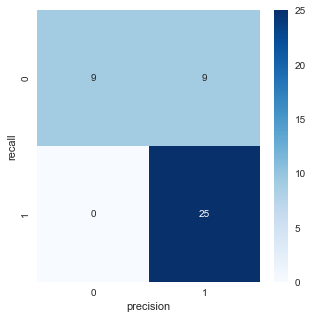

classification report:               precision    recall  f1-score   support

           0       1.00      0.50      0.67        18
           1       0.74      1.00      0.85        25

    accuracy                           0.79        43
   macro avg       0.87      0.75      0.76        43
weighted avg       0.85      0.79      0.77        43

accuracy : 0.79
precision : 0.74
recall : 1.0
f1 : 0.85

Model Name: RandomForestClassifier(n_estimators=15)
-----------------------------------------------------------------------------------------------------------------------


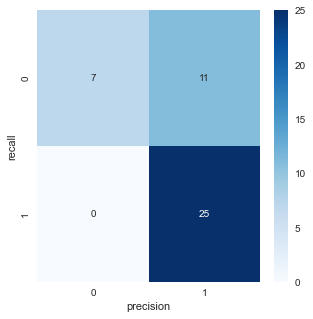

classification report:               precision    recall  f1-score   support

           0       1.00      0.39      0.56        18
           1       0.69      1.00      0.82        25

    accuracy                           0.74        43
   macro avg       0.85      0.69      0.69        43
weighted avg       0.82      0.74      0.71        43

accuracy : 0.74
precision : 0.69
recall : 1.0
f1 : 0.82

Model Name: DecisionTreeClassifier(max_depth=4)
-----------------------------------------------------------------------------------------------------------------------


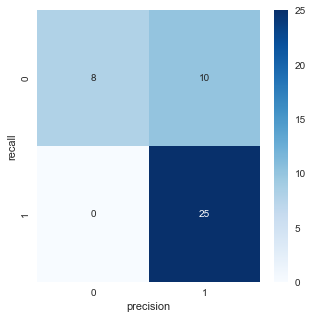

classification report:               precision    recall  f1-score   support

           0       1.00      0.44      0.62        18
           1       0.71      1.00      0.83        25

    accuracy                           0.77        43
   macro avg       0.86      0.72      0.72        43
weighted avg       0.83      0.77      0.74        43

accuracy : 0.77
precision : 0.71
recall : 1.0
f1 : 0.83

Model Name: SVC(C=1, gamma='auto', kernel='linear')
-----------------------------------------------------------------------------------------------------------------------


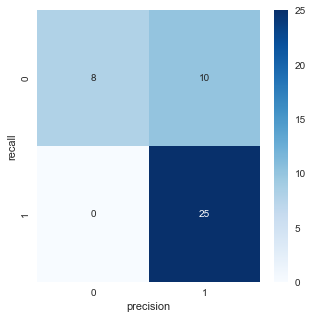

classification report:               precision    recall  f1-score   support

           0       1.00      0.44      0.62        18
           1       0.71      1.00      0.83        25

    accuracy                           0.77        43
   macro avg       0.86      0.72      0.72        43
weighted avg       0.83      0.77      0.74        43

accuracy : 0.77
precision : 0.71
recall : 1.0
f1 : 0.83



In [166]:
model=[LogisticRegression(C=1),RandomForestClassifier(n_estimators=15),DecisionTreeClassifier(max_depth=4),
      SVC(C=1,gamma='auto',kernel='linear')]
for i in model:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('Model Name:',i)
    print('-----------------------------------------------------------------------------------------------------------------------')
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues')
    plt.xlabel('precision')
    plt.ylabel('recall')
    
    plt.show()
    print('classification report:',classification_report(y_test,y_pred))
    print('accuracy :',round(accuracy_score(y_test,y_pred),2))
    print('precision :',round(precision_score(y_test,y_pred),2))
    print('recall :',round(recall_score(y_test,y_pred),2))
    print('f1 :',round(f1_score(y_test,y_pred),2))
    print()
    

# Prediction using RandomForestclassifier

In [163]:
model=RandomForestClassifier(n_estimators=5)
model.fit(x_train,y_train)
model.predict([[1,80,0,70,1,2,77,2,0,67,0,60]])

array([1])